# Kapitel 4: Supervised Learning

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from distutils.version import StrictVersion

In [4]:
import sklearn
print(sklearn.__version__)

assert StrictVersion(sklearn.__version__ ) >= StrictVersion('0.18.1')

0.19.1


## Decision Tree Klassifikator

Text(0,0.5,'y')

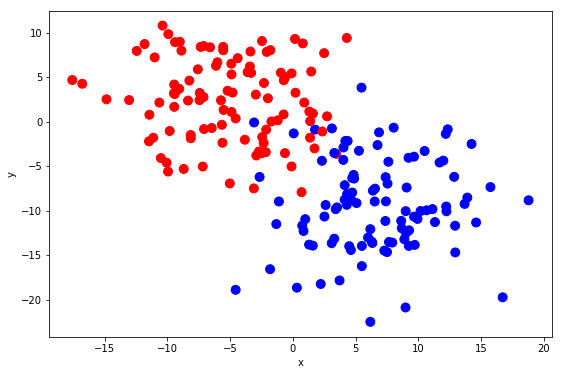

In [5]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pylab as plt

RNDST = np.random.seed(52)
CMAP = 'bwr'
fig = plt.figure(1, figsize=(9, 6))

X, y = make_blobs(n_samples=200, centers=2, random_state=RNDST, cluster_std=5.)
plt.scatter(X[:, 0], X[:, 1], s=80, c=y, cmap=CMAP)

plt.xlabel('x')
plt.ylabel('y')

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X, y)
print(tree.score(X,y))

1.0


Text(0,0.5,'y')

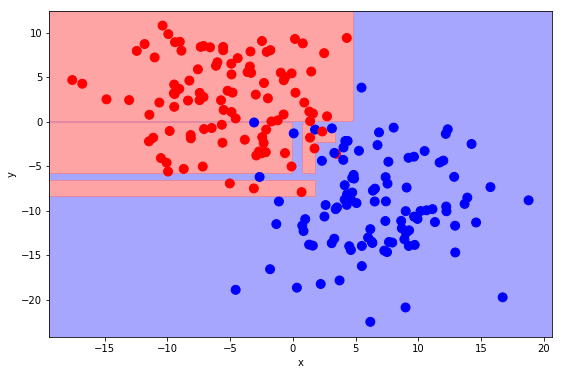

In [7]:
fig = plt.figure(1, figsize=(9, 6))
ax = plt.gca()
    
ax.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap=CMAP, clim=(y.min(), y.max()), zorder=3)
ax.axis('tight')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),np.linspace(*ylim, num=200))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.7,
                       levels=np.arange(n_classes + 1) - 0.5,
                       cmap=CMAP, clim=(y.min(), y.max()),
                       zorder=1)

ax.set(xlim=xlim, ylim=ylim)
plt.xlabel('x')
plt.ylabel('y')

(0.0, 1.0, 0.0, 1.0)

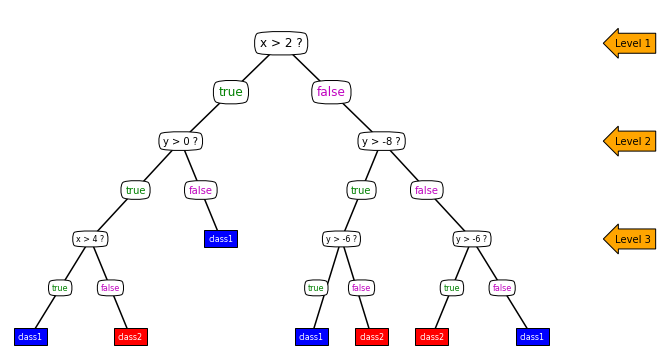

In [8]:
fig = plt.figure(1, figsize=(9, 6))
ax = plt.gca()

def textbox(ax, x, y, t, size=10, fc='w',ec='k', bstyle='round4', **kwargs):
    ax.text(x, y, t, ha='center', va='center', size=size,
            bbox=dict(boxstyle=bstyle, pad=0.5, ec=ec, fc=fc), **kwargs)

slev0 = 12
slev1 = 10
slev2 = 8
slev3 = 6

textbox(ax, 1.2, 0.9, "Level 1", slev1, alpha=0.99,color='k',fc='orange',bstyle='larrow')
textbox(ax, 1.2, 0.6, "Level 2", slev1, alpha=0.99,color='k',fc='orange',bstyle='larrow')
textbox(ax, 1.2, 0.3, "Level 3", slev1, alpha=0.99,color='k',fc='orange',bstyle='larrow')

textbox(ax, 0.5, 0.9, "x > 2 ?", slev0)

textbox(ax, 0.3, 0.6, "y > 0 ?", slev1)
textbox(ax, 0.7, 0.6, "y > -8 ?", slev1)

textbox(ax, 0.12, 0.3, "x > 4 ?", slev2)
#textbox(ax, 0.38, 0.3, "x > 4 ?", slev2)
textbox(ax, 0.62, 0.3, "y > -6 ?", slev2)
textbox(ax, 0.88, 0.3, "y > -6 ?", slev2)

textbox(ax, 0.4, 0.75, "true", slev0, alpha=0.99,color='g')
textbox(ax, 0.6, 0.75, "false", slev0, alpha=0.99,color='m')

textbox(ax, 0.21, 0.45, "true", slev1, alpha=0.99,color='g')
textbox(ax, 0.34, 0.45, "false", slev1, alpha=0.99,color='m')
textbox(ax, 0.66, 0.45, "true", slev1, alpha=0.99,color='g')
textbox(ax, 0.79, 0.45, "false", slev1, alpha=0.99,color='m')

textbox(ax, 0.06, 0.15, "true", slev2, alpha=0.99,color='g')
textbox(ax, 0.16, 0.15, "false", slev2, alpha=0.99,color='m')
#textbox(ax, 0.34, 0.15, "true", slev2, alpha=0.99,color='g')
#textbox(ax, 0.43, 0.15, "false", slev2, alpha=0.99,color='m')
textbox(ax, 0.57, 0.15, "true", slev2, alpha=0.99,color='g')
textbox(ax, 0.66, 0.15, "false", slev2, alpha=0.99,color='m')
textbox(ax, 0.84, 0.15, "true", slev2, alpha=0.99,color='g')
textbox(ax, 0.94, 0.15, "false", slev2, alpha=0.99,color='m')

ax.plot([0.3, 0.5, 0.7], [0.6, 0.9, 0.6], '-k')
ax.plot([0.12, 0.3, 0.38], [0.3, 0.6, 0.3], '-k')
ax.plot([0.62, 0.7, 0.88], [0.3, 0.6, 0.3], '-k')
ax.plot([0.0, 0.12, 0.20], [0.0, 0.3, 0.0], '-k')
#ax.plot([0.32, 0.38, 0.44], [0.0, 0.3, 0.0], '-k')
ax.plot([0.56, 0.62, 0.68], [0.0, 0.3, 0.0], '-k')
ax.plot([0.8, 0.88, 1.0], [0.0, 0.3, 0.0], '-k')
ax.axis([0, 1, 0, 1])

textbox(ax, .0, 0., "class1", slev2, alpha=0.99,color='w',fc='b',bstyle='square')
textbox(ax, .20, 0., "class2", slev2, alpha=0.99,color='w',fc='r',bstyle='square')
#textbox(ax, .32, 0., "class2", slev2, alpha=0.99,color='w',fc='r',bstyle='square')
#textbox(ax, .44, 0., "class1", slev2, alpha=0.99,color='w',fc='b',bstyle='square')
textbox(ax, 0.38, 0.3, "class1", slev2, alpha=0.99,color='w',fc='b',bstyle='square')
textbox(ax, .56, 0., "class1", slev2, alpha=0.99,color='w',fc='b',bstyle='square')
textbox(ax, .68, 0., "class2", slev2, alpha=0.99,color='w',fc='r',bstyle='square')
textbox(ax, .8, 0., "class2", slev2, alpha=0.99,color='w',fc='r',bstyle='square')
textbox(ax, 1., 0., "class1", slev2, alpha=0.99,color='w',fc='b',bstyle='square')

ax.axis('off')

### Level 1

In [9]:
tree1 = DecisionTreeClassifier(max_depth=1)
tree1.fit(X, y)
print(tree1.score(X,y))

0.91


Text(0,0.5,'y')

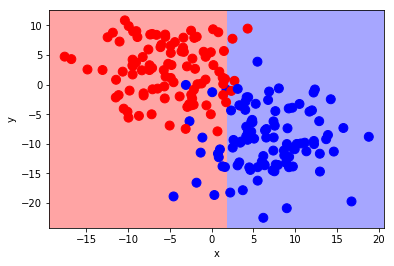

In [10]:
tree1 = DecisionTreeClassifier(max_depth=1)
tree1.fit(X, y)

plt.clf()
fig = plt.figure(1, figsize=(9, 6))
ax = plt.gca()

ax.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap=CMAP, clim=(y.min(), y.max()), zorder=3)
ax.axis('tight')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
Z = tree1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.7,
                       levels=np.arange(n_classes + 1) - 0.5,
                       cmap=CMAP, clim=(y.min(), y.max()),
                       zorder=1)

ax.set(xlim=xlim, ylim=ylim)
plt.xlabel('x')
plt.ylabel('y')

### Level 2

In [11]:
tree2 = DecisionTreeClassifier(max_depth=2)
tree2.fit(X, y)
print(tree2.score(X,y))

0.97


Text(0,0.5,'y')

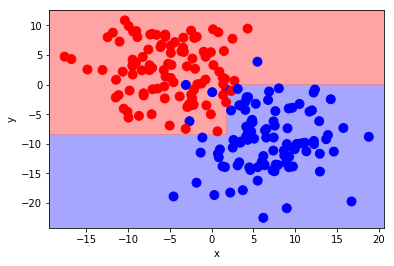

In [12]:
tree2 = DecisionTreeClassifier(max_depth=2)
tree2.fit(X, y)

plt.clf()
fig = plt.figure(1, figsize=(9, 6))
ax = plt.gca()

ax.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap=CMAP, clim=(y.min(), y.max()), zorder=3)
ax.axis('tight')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
Z = tree2.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.7,
                       levels=np.arange(n_classes + 1) - 0.5,
                       cmap=CMAP, clim=(y.min(), y.max()),
                       zorder=1)

ax.set(xlim=xlim, ylim=ylim)
plt.xlabel('x')
plt.ylabel('y')

### Level 3

In [13]:
tree3 = DecisionTreeClassifier(max_depth=3)
tree3.fit(X, y)
print(tree3.score(X,y))

0.975


Text(0,0.5,'y')

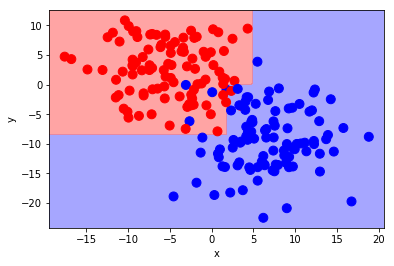

In [14]:
tree3 = DecisionTreeClassifier(max_depth=3)
tree3.fit(X, y)

plt.clf()
fig = plt.figure(1, figsize=(9, 6))
ax = plt.gca()

ax.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap=CMAP, clim=(y.min(), y.max()), zorder=3)
ax.axis('tight')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
Z = tree3.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.7,
                       levels=np.arange(n_classes + 1) - 0.5,
                       cmap=CMAP, clim=(y.min(), y.max()),
                       zorder=1)

ax.set(xlim=xlim, ylim=ylim)
plt.xlabel('x')
plt.ylabel('y')

### Level 4

In [15]:
tree4 = DecisionTreeClassifier(max_depth=4)
tree4.fit(X, y)
print(tree4.score(X,y))

0.985


Text(0,0.5,'y')

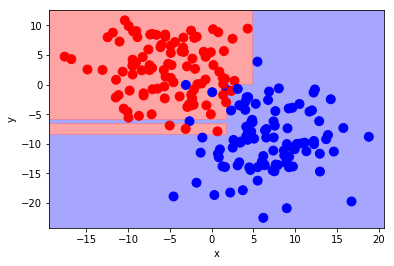

In [16]:
tree4 = DecisionTreeClassifier(max_depth=4)
tree4.fit(X, y)

plt.clf()
fig = plt.figure(1, figsize=(9, 6))
ax = plt.gca()

ax.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap=CMAP, clim=(y.min(), y.max()), zorder=3)
ax.axis('tight')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
Z = tree4.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.7,
                       levels=np.arange(n_classes + 1) - 0.5,
                       cmap=CMAP, clim=(y.min(), y.max()),
                       zorder=1)

ax.set(xlim=xlim, ylim=ylim)
plt.xlabel('x')
plt.ylabel('y')

### Level 5

In [17]:
tree5 = DecisionTreeClassifier(max_depth=5)
tree5.fit(X, y)
print(tree5.score(X,y))

0.99


Text(0,0.5,'y')

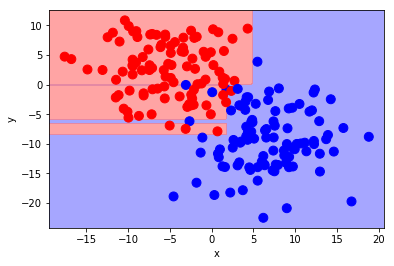

In [18]:
tree5 = DecisionTreeClassifier(max_depth=5)
tree5.fit(X, y)

plt.clf()
fig = plt.figure(1, figsize=(9, 6))
ax = plt.gca()

ax.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap=CMAP, clim=(y.min(), y.max()), zorder=3)
ax.axis('tight')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
Z = tree5.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.7,
                       levels=np.arange(n_classes + 1) - 0.5,
                       cmap=CMAP, clim=(y.min(), y.max()),
                       zorder=1)

ax.set(xlim=xlim, ylim=ylim)
plt.xlabel('x')
plt.ylabel('y')

### vs Overfitting

In [19]:
tree = DecisionTreeClassifier(max_depth=5,
                              min_samples_leaf=3,
                              min_samples_split=2)
tree.fit(X, y)
print(tree.score(X,y))

0.97


Text(0,0.5,'y')

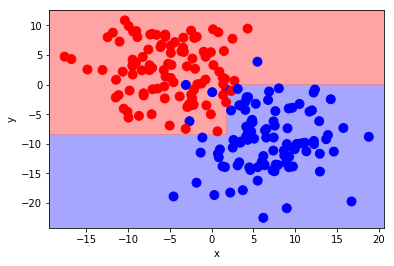

In [20]:
tree5 = DecisionTreeClassifier(max_depth=5,min_samples_leaf=3,min_samples_split=2)
tree5.fit(X, y)

plt.clf()
fig = plt.figure(1, figsize=(9, 6))
ax = plt.gca()

ax.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap=CMAP, clim=(y.min(), y.max()), zorder=3)
ax.axis('tight')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
Z = tree5.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.7,
                       levels=np.arange(n_classes + 1) - 0.5,
                       cmap=CMAP, clim=(y.min(), y.max()),
                       zorder=1)

ax.set(xlim=xlim, ylim=ylim)
plt.xlabel('x')
plt.ylabel('y')

In [21]:
tree = DecisionTreeClassifier(max_depth=5,
                              min_samples_leaf=1,
                              min_samples_split=10)
tree.fit(X, y)
print(tree.score(X,y))

0.98


Text(0,0.5,'y')

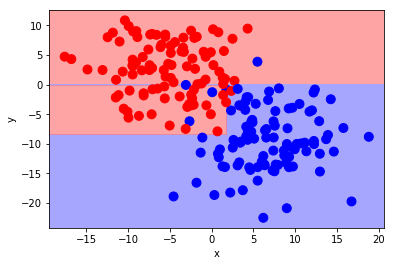

In [22]:
tree5 = DecisionTreeClassifier(max_depth=5,min_samples_leaf=1,min_samples_split=10)
tree5.fit(X, y)

plt.clf()
fig = plt.figure(1, figsize=(9, 6))
ax = plt.gca()

ax.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap=CMAP, clim=(y.min(), y.max()), zorder=3)
ax.axis('tight')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
Z = tree5.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.7,
                       levels=np.arange(n_classes + 1) - 0.5,
                       cmap=CMAP, clim=(y.min(), y.max()),
                       zorder=1)

ax.set(xlim=xlim, ylim=ylim)
plt.xlabel('x')
plt.ylabel('y')

In [23]:
tree = DecisionTreeClassifier(max_depth=5,
                              min_samples_leaf=1,
                              min_samples_split=2,
                              max_leaf_nodes=8)
tree.fit(X, y)
print(tree.score(X,y))

0.98


Text(0,0.5,'y')

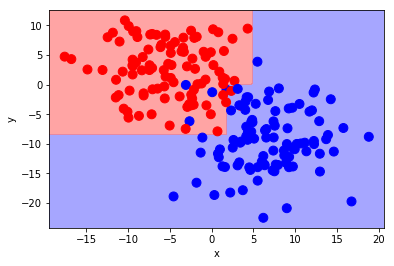

In [24]:
tree5 = DecisionTreeClassifier(max_depth=5,min_samples_leaf=1,min_samples_split=2,max_leaf_nodes=8)
tree5.fit(X, y)

plt.clf()
fig = plt.figure(1, figsize=(9, 6))
ax = plt.gca()

ax.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap=CMAP, clim=(y.min(), y.max()), zorder=3)
ax.axis('tight')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
Z = tree5.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.7,
                       levels=np.arange(n_classes + 1) - 0.5,
                       cmap=CMAP, clim=(y.min(), y.max()),
                       zorder=1)

ax.set(xlim=xlim, ylim=ylim)
plt.xlabel('x')
plt.ylabel('y')

## Split-Kriterium: Gini Impurity vs. Entropy

In [25]:
tree5 = DecisionTreeClassifier(max_depth=5,min_samples_leaf=1,min_samples_split=2,
                               max_leaf_nodes=None,criterion='entropy')
tree5.fit(X, y)

print(tree5.score(X,y))

0.985


Text(0,0.5,'y')

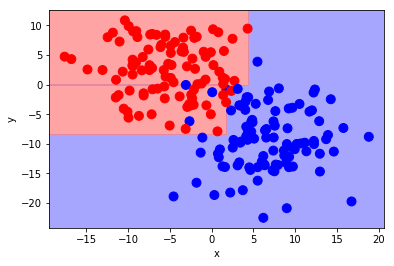

In [26]:
plt.clf()
fig = plt.figure(1, figsize=(9, 6))
ax = plt.gca()

ax.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap=CMAP, clim=(y.min(), y.max()), zorder=3)
ax.axis('tight')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
    
Z = tree5.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
n_classes = len(np.unique(y))
contours = ax.contourf(xx, yy, Z, alpha=0.7,
                       levels=np.arange(n_classes + 1) - 0.5,
                       cmap=CMAP, clim=(y.min(), y.max()),
                       zorder=1)

ax.set(xlim=xlim, ylim=ylim)
plt.xlabel('x')
plt.ylabel('y')


## Bagging Methods - Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [28]:
rf.fit(X,y)
print(rf.score(X,y))

0.995


In [29]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data
y = iris.target

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)
print(rf.score(X,y))

1.0


1.0


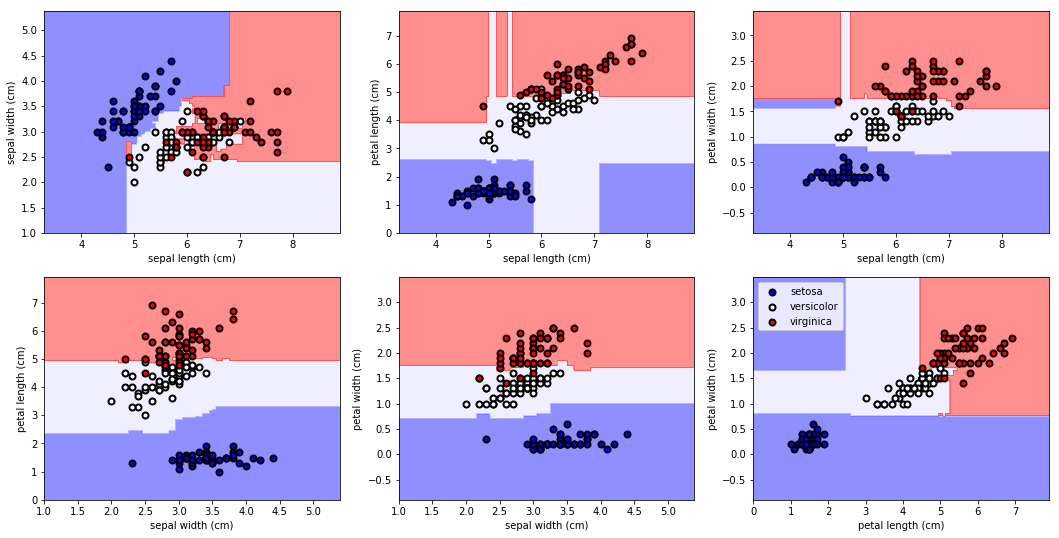

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)
print(rf.score(X,y))

# In[ ]:

fig = plt.figure(1, figsize=(18, 9))

n_classes = 3
colors = 'bwr'#['b','y','r']
CMAP = colors#plt.cm.rainbow
plot_step = 0.01

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    clf = rf.fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=CMAP, alpha=0.5)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    for i, color in zip(range(n_classes), colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', lw=2, label=iris.target_names[i],
                    cmap=CMAP)

    plt.axis("tight")

plt.legend(loc='upper left')
plt.show()

## Boosted Decision Trees

In [31]:
X = iris.data
y = iris.target

from sklearn.ensemble import AdaBoostClassifier
bdt = AdaBoostClassifier()
bdt.fit(X,y)
print(bdt.score(X,y))

0.96


In [32]:
X = iris.data
y = iris.target

from sklearn.ensemble import AdaBoostClassifier
bdt = AdaBoostClassifier(learning_rate=10.1,n_estimators=500)
bdt.fit(X,y)
print(bdt.score(X,y))

0.2733333333333333


In [33]:
from sklearn.ensemble import AdaBoostClassifier
bdt = AdaBoostClassifier()
bdt

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

0.96


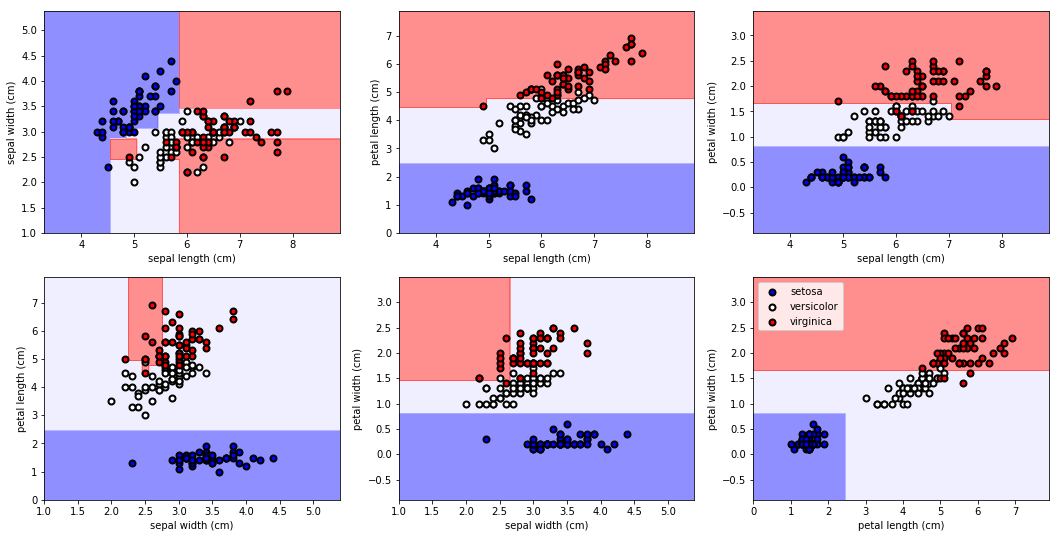

In [34]:
from sklearn.ensemble import AdaBoostClassifier
bdt = AdaBoostClassifier()
bdt.fit(X,y)
print(bdt.score(X,y))

fig = plt.figure(1, figsize=(18, 9))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    clf = bdt.fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=CMAP, alpha=0.5)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    for i, color in zip(range(n_classes), colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, edgecolor='black', lw=2, label=iris.target_names[i],
                    cmap=CMAP)

    plt.axis("tight")

plt.legend(loc='upper left')
plt.show()